In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

A picture of the simulation has been included in the folder (Sim1000.png)

First, we read in the data:

In [2]:
truthData = pd.read_csv( "particle_data/output_nt_Truth.csv", comment="#", \
names=[ "EventID", "Phi", "Theta", "Momentum" ] )
tracker1Data = pd.read_csv( "particle_data/output_nt_Tracker1.csv", comment="#", \
names=[ "EventID", "Phi", "Theta" ] )
tracker2Data = pd.read_csv( "particle_data/output_nt_Tracker2.csv", comment="#", \
names=[ "EventID", "Phi", "Theta" ] )

In [3]:
truthData

,EventID,Phi,Theta,Momentum
0,0,-0.063847,2.422340,45.2024
1,0,3.077680,0.719255,45.4999
2,1,0.702142,2.213210,45.4999
3,1,-2.439450,0.928381,45.4999
4,2,1.446030,0.929328,45.4999
...,...,...,...,...
1995,997,2.300160,1.147010,45.1561
1996,998,-2.633190,1.805450,42.1890
1997,998,0.429832,1.352430,44.6172
1998,999,-1.417030,1.447320,45.0538


In [4]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(tracker1Data.head(70))
    
# Here you can see that after 5, there are no particles until event 12

,EventID,Phi,Theta
0,1,-2.447670,0.928358
1,1,0.710358,2.213220
2,2,-1.703770,2.212250
3,2,1.454290,0.929340
4,3,0.335390,2.182440
5,3,-2.790080,0.959136
6,4,0.710495,2.043770
7,4,-2.416360,1.098010
8,4,-2.416360,1.098010
9,4,-2.416230,1.098020


In [5]:
tracker2Data

,EventID,Phi,Theta
0,0,-2.066390,2.334350
1,1,-2.455900,0.928325
2,1,0.718557,2.213250
3,1,0.718558,2.213250
4,1,0.718534,2.213250
...,...,...,...
3233,997,-0.875075,2.025630
3234,998,0.443603,1.352440
3235,998,-2.647820,1.805460
3236,999,1.627990,1.771620


To take the number of true particles, we count the number of true particles in truthdata. To find the layer one hits we count the length of the EventID list (as we have many hits associated with singular events) and same for layer two hits.

In [6]:
# Finding number of unique particles in truthdata
truthData['EventID'].size

2000

Layer one hits per event

In [7]:
# Find number of layer one hits in each event
hits1 = tracker1Data.groupby(['EventID']).size().reset_index(name='count')

#hits = tracker1Data['EventID'].value_counts()

# Display full list (Its long!)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(hits1)

# Displaying eventID and number of hits

,EventID,count
0,1,2
1,2,2
2,3,2
3,4,34
4,5,2
5,6,20
6,13,13
7,14,2
8,17,2
9,18,2


Layer two hits per event

In [8]:
# Find number of layer two hits in each event
hits2 = tracker2Data.groupby(['EventID']).size().reset_index(name='count')



# Display full list (Its long!)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(hits2)

# Displaying eventID and number of hits

,EventID,count
0,0,1
1,1,7
2,2,2
3,3,6
4,4,2
5,5,2
6,6,8
7,13,15
8,14,2
9,17,2


EventIDs that are excluded from this list are due to them having no true particles within them, and therefore having a count of zero.

Next, find all pairs of hits between layer 1 and layer 2.

Also, calculate the momentum of the singular particles formed by these pairs (which is the next mark) and collect them into a list.

Once we've done that, we compare the pair to their true particle momenta values, and collect the distribution of $\frac{p_{reconstructed} - p_{true}}{p_{true}}$

In [26]:
# For each event in layer 1, scan over the particles and compare to the same event in layer 2. If theta different is sufficienctly small, find the pair and collect it.
#print(len(hits1['EventID']))
#print(hits1['count'][3])
#print(hits1['EventID'][3])
#hits1

# create list for number of pairs per event
event_no_list = []
mom_list = []
distribution_list = []

dist = 0

# Relevant variables
B = 0.5 # Tesla
# Radii of the two trackers
R1 = 4 # Metres
R2 = 8 # Metres

# Loop over all events in layer 1
for i in range(len(hits1['EventID'])):
    # reset pair number
    pair_no = 0
    # Loop over all counts in each event
    for j in range(hits1['count'][i]):
        # Compare to each event in same event in layer 2 
        # Check to make sure layer 2 has the event
        if ((hits2['EventID'] == hits1['EventID'][i]).any()):
            for k in range(hits2['count'][i]):
                # check angle to find pairs
                if (math.fabs(tracker1Data['Theta'][j] - tracker2Data['Theta'][k]) < 0.0001):
                    # Collect number of pairs for each event.
                    pair_no += 1
                    # Calculate momenta for each pair and append to a list.
                    deltaPhi = math.fabs(tracker1Data['Phi'][j]-tracker2Data['Phi'][k])
                    sagitta = math.sin(deltaPhi) * R1
                    # Simplified R as total path is given as L=8, and denominator is 8*sagitta.
                    R = (8)/(sagitta)
                    # Calculte and append momentum to list
                    mom = (0.3 * B * R)/np.sin(tracker1Data['Theta'][j])
                    mom_list.append(mom)
                    
                    # Compare this momenta to true value of momenta for this event, and append to list
                    # i*2 is a hacky way to get the correct momenta, as they come in pairs.
                    
                    # Need to check which true value to use, so compare thetas of true against layer 1
                    if (math.fabs(truthData['Theta'][i*2] - tracker1Data['Theta'][j]) < 0.0001):
                        dist = (mom - truthData['Momentum'][i*2])/truthData['Momentum'][i*2]
                    elif (math.fabs(tracker1Data['Theta'][(i*2)+1] - tracker1Data['Theta'][j]) < 0.0001):
                        dist = (mom - truthData['Momentum'][(i*2)+1])/truthData['Momentum'][(i*2)+1]
                    distribution_list.append(dist)
                    
        else:
            continue
    print("Number of pairs in event {:.2f}: {:.2f}".format(hits1['EventID'][i], pair_no))
    event_no_list.append(pair_no)


Number of pairs in event 1.00: 0.00
Number of pairs in event 2.00: 6.00
Number of pairs in event 3.00: 1.00
Number of pairs in event 4.00: 5.00
Number of pairs in event 5.00: 1.00
Number of pairs in event 6.00: 1.00
Number of pairs in event 13.00: 7.00
Number of pairs in event 14.00: 7.00
Number of pairs in event 17.00: 1.00
Number of pairs in event 18.00: 1.00
Number of pairs in event 20.00: 1.00
Number of pairs in event 23.00: 1.00
Number of pairs in event 24.00: 1.00
Number of pairs in event 25.00: 1.00
Number of pairs in event 26.00: 1.00
Number of pairs in event 27.00: 0.00
Number of pairs in event 30.00: 1.00
Number of pairs in event 32.00: 1.00
Number of pairs in event 33.00: 15.00
Number of pairs in event 34.00: 1.00
Number of pairs in event 35.00: 6.00
Number of pairs in event 37.00: 7.00
Number of pairs in event 38.00: 7.00
Number of pairs in event 40.00: 1.00
Number of pairs in event 41.00: 1.00
Number of pairs in event 42.00: 1.00
Number of pairs in event 44.00: 1.00
Number

Number of pairs in event 449.00: 4.00
Number of pairs in event 450.00: 10.00
Number of pairs in event 451.00: 1.00
Number of pairs in event 452.00: 1.00
Number of pairs in event 453.00: 7.00
Number of pairs in event 454.00: 6.00
Number of pairs in event 455.00: 1.00
Number of pairs in event 456.00: 1.00
Number of pairs in event 457.00: 1.00
Number of pairs in event 458.00: 4.00
Number of pairs in event 459.00: 1.00
Number of pairs in event 460.00: 1.00
Number of pairs in event 462.00: 1.00
Number of pairs in event 464.00: 1.00
Number of pairs in event 465.00: 1.00
Number of pairs in event 468.00: 1.00
Number of pairs in event 470.00: 1.00
Number of pairs in event 478.00: 1.00
Number of pairs in event 479.00: 1.00
Number of pairs in event 480.00: 7.00
Number of pairs in event 481.00: 7.00
Number of pairs in event 482.00: 1.00
Number of pairs in event 485.00: 1.00
Number of pairs in event 489.00: 1.00
Number of pairs in event 490.00: 1.00
Number of pairs in event 494.00: 7.00
Number of p

Number of pairs in event 888.00: 7.00
Number of pairs in event 889.00: 1.00
Number of pairs in event 891.00: 7.00
Number of pairs in event 893.00: 1.00
Number of pairs in event 895.00: 1.00
Number of pairs in event 896.00: 1.00
Number of pairs in event 897.00: 1.00
Number of pairs in event 899.00: 1.00
Number of pairs in event 901.00: 1.00
Number of pairs in event 903.00: 1.00
Number of pairs in event 905.00: 1.00
Number of pairs in event 906.00: 1.00
Number of pairs in event 907.00: 1.00
Number of pairs in event 909.00: 1.00
Number of pairs in event 910.00: 5.00
Number of pairs in event 911.00: 1.00
Number of pairs in event 912.00: 1.00
Number of pairs in event 913.00: 1.00
Number of pairs in event 914.00: 1.00
Number of pairs in event 915.00: 1.00
Number of pairs in event 917.00: 1.00
Number of pairs in event 918.00: 1.00
Number of pairs in event 919.00: 1.00
Number of pairs in event 923.00: 7.00
Number of pairs in event 924.00: 1.00
Number of pairs in event 926.00: 3.00
Number of pa

In [23]:
# Print pairs per event separately
print(event_no_list)
print(np.sum(event_no_list))

[0, 6, 1, 5, 1, 1, 7, 7, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 15, 1, 6, 7, 7, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 7, 1, 1, 1, 1, 17, 7, 1, 7, 1, 1, 1, 10, 1, 6, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 7, 1, 1, 1, 10, 1, 1, 1, 7, 1, 1, 1, 1, 7, 1, 1, 7, 1, 1, 1, 1, 1, 7, 1, 0, 1, 1, 1, 1, 5, 1, 2, 1, 7, 7, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 3, 1, 1, 7, 2, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 7, 7, 1, 1, 1, 1, 2, 1, 7, 1, 7, 1, 7, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 19, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 0, 1, 2, 1, 1, 1, 1, 7, 1, 1, 7, 1, 1, 1, 1, 1, 1, 6, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 6, 1, 1, 7, 7, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 7, 1, 1, 6, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 10, 1, 1, 7, 6, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 7, 1, 1, 1, 1, 7, 1, 1, 7, 1, 1, 1, 7, 1, 1, 1, 14, 1, 7, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 19, 1, 2, 1, 1

In [21]:
# Print momentum list
print(mom_list[:10])

[45.52925541920648, 45.700894182409385, 45.695321027524365, 45.82945301872997, 45.924940622494724, 45.936200625358076, 45.52925541920648, 45.52925541920648, 45.700894182409385, 45.695321027524365]


Plot a histogram of the distribution of predicted against true momenta

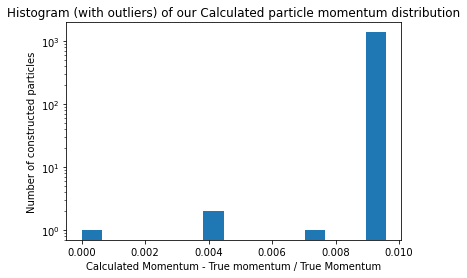

In [14]:
plt.hist(distribution_list, bins = 15, log = True)
plt.xlabel("Calculated Momentum - True momentum / True Momentum")
plt.ylabel("Number of constructed particles")
plt.title("Histogram (with outliers) of our Calculated particle momentum distribution")
plt.show()

Very accurate results! Although there appears to be a general offset of 0.01. Reran the code and restarted the kernel to check, but these results seem to be the real deal. I'd therefore argue that the momentum resolution 